<a href="https://colab.research.google.com/github/Silvia-Ding/Machine-Learning-Practice-2024/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

有效前沿
ret_data 横轴是股票代码，纵轴是日期，给定一个ret matrix求有效前沿，最终结果需要代码和图像
Efficient Frontier:  
Given a return matrix `ret_data`, where the horizontal axis represents stock tickers and the vertical axis represents dates, calculate the efficient frontier. The final output should include both the code and the corresponding visualization.

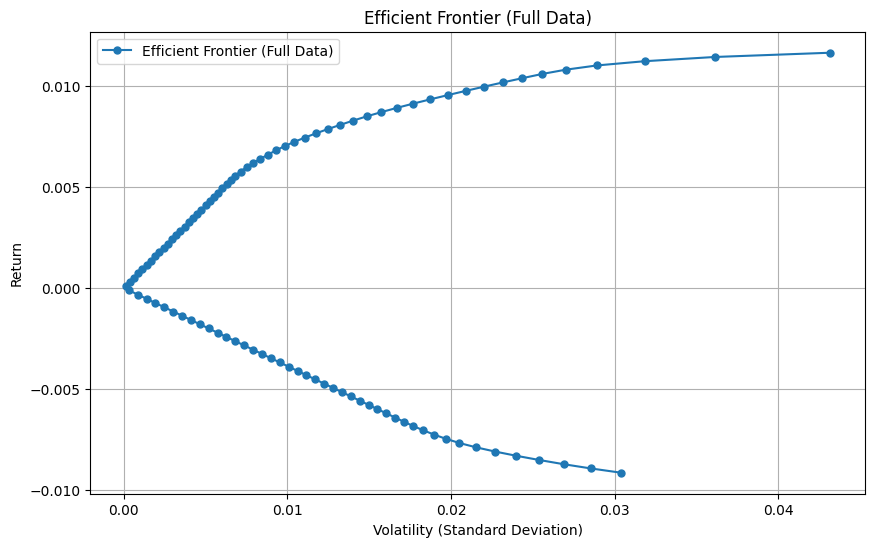

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 加载收益率数据
ret_data_path = "/content/ret_data.csv"
ret_data = pd.read_csv(ret_data_path, index_col=0)

# 数据清理：去除全为NaN的列和并用Mean代替NaN
cleaned_ret_data0 = ret_data.dropna(axis=1, how='all')
cleaned_ret_data = cleaned_ret_data0.fillna(cleaned_ret_data0.mean())

# 计算平均收益率和协方差矩阵
returns = cleaned_ret_data.values
mean_returns = np.mean(returns, axis=0)
cov_matrix = np.cov(returns.T)

# 定义组合绩效计算函数
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# 定义最小化波动率的目标函数
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# 有效前沿计算函数（针对整个数据集）
def efficient_frontier(mean_returns, cov_matrix, num_assets, num_points=100):
    results = {'returns': [], 'volatility': [], 'weights': []}
    target_returns = np.linspace(mean_returns.min(), mean_returns.max(), num_points)

    for target in target_returns:
        constraints_return = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                    {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target})
        weights_init = np.ones(num_assets) / num_assets  # 初始权重向量
        optimization = minimize(minimize_volatility, weights_init, args=(mean_returns, cov_matrix),
                                method='SLSQP', bounds=[(0, 1)] * num_assets, constraints=constraints_return)
        if optimization.success:
            portfolio_return, portfolio_volatility = portfolio_performance(optimization.x, mean_returns, cov_matrix)
            results['returns'].append(portfolio_return)
            results['volatility'].append(portfolio_volatility)
            results['weights'].append(optimization.x)

    return results

# 数据集中的资产数量
num_assets = returns.shape[1]

# 计算有效前沿
ef_results = efficient_frontier(mean_returns, cov_matrix, num_assets)

# 绘制有效前沿
plt.figure(figsize=(10, 6))
plt.plot(ef_results['volatility'], ef_results['returns'], marker='o', linestyle='-', markersize=5, label='Efficient Frontier (Full Data)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier (Full Data)')
plt.legend()
plt.grid()
plt.show()
